<style>
    h1 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 24px; /* Increase font size for headings */
        font-weight: bold; /* Make headings bold */
    }

    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h1>Home Work-1 Computing</h1>


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [ ]:
def present_image(img, title, xlabel = '', ylabel = ''):
  # convert each of the RGB chnnels to the correct dynamic range:
  img = (((img-np.min(img))/np.max(img))* 255).astype(int);
  # Plot:
  plt.figure(figsize=(16,8));
  plt.imshow(img, cmap="gray");
  plt.title(title);
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show();
  

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Processing with FFT</title>
</head>
<body>
    <p>Now, we will load the 'Anna.jpg' and 'cat.jpg' image and perform FFT and FFT shift.</p>
</body>
</html>


In [ ]:

# Load image in a gray scale format
CAT_I = cv2.imread('./imgs/cat.jpg', cv2.IMREAD_GRAYSCALE)
# Load image in a gray scale format
ANNA_I = cv2.imread('./imgs/Anna.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
plt.imshow(CAT_I, cmap="gray");
plt.title('/imgs/cat.jpg');
plt.subplot(1,2,2)
plt.imshow(ANNA_I, cmap="gray");
plt.title('./imgs/Anna.jpg');

plt.show()



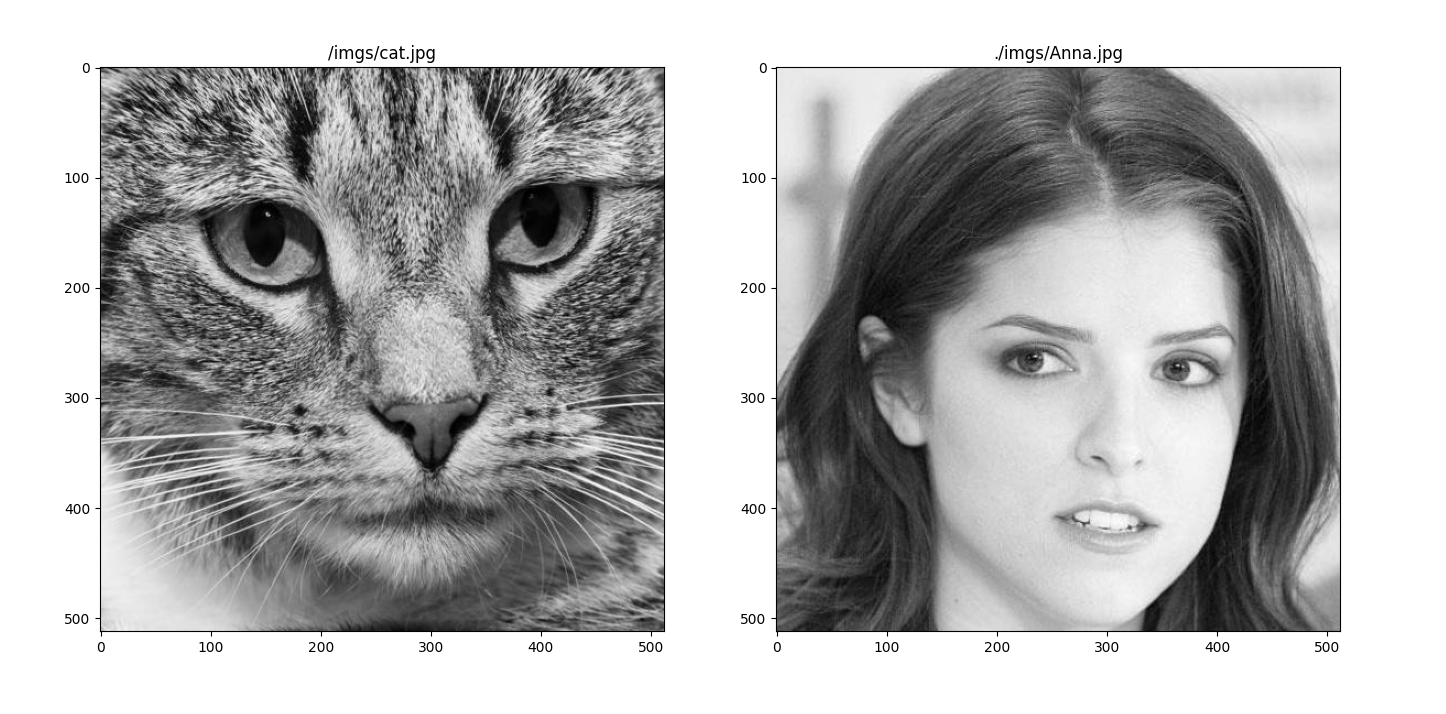

Next, is a function that translates the amplitude of an image to a logarithmic scale. For any pixel with a magnitude of $x$, we will convert using $log_{10}(x+1)$. Since we expect the Fourier transform to output complex values, we will use `abs()` to calculate the magnitude. 

In [ ]:
def logarithmic_display_of_image(img):
  return np.log10(np.abs(img)+1)

In [ ]:
CAT_Img_f = np.fft.fft2(CAT_I);
CAT_Img_f_shifted = np.fft.fftshift(CAT_Img_f);
phase_CAt = np.angle(CAT_Img_f_shifted)
AMPl_CAT = np.abs(logarithmic_display_of_image(CAT_Img_f_shifted))
# present_image(AMP_CAT, "cat image amplitude", 'u', '|F(u)|');


# Perfrom the Furier tranform and shift the result
ANNA_Img_f = np.fft.fft2(ANNA_I);
ANNA_Img_f_shifted = np.fft.fftshift(ANNA_Img_f);
ANNA_PHASE = np.angle(ANNA_Img_f_shifted)
AMPl_ANNA = np.abs(logarithmic_display_of_image(ANNA_Img_f_shifted))

plt.figure(figsize=(16,8));
plt.subplot(2,2,1)
plt.imshow(CAT_I, cmap="gray");
plt.title('/imgs/cat.jpg');
plt.subplot(2,2,2)
plt.imshow(AMPl_CAT, cmap="gray");
plt.title("cat image amplitude");
plt.xlabel('u')
plt.ylabel('|F(u)|')


plt.subplot(2,2,3)
plt.imshow(ANNA_I, cmap="gray");
plt.title('/imgs/Anna.jpg');
plt.subplot(2,2,4)
plt.imshow(AMPl_ANNA, cmap="gray");
plt.title("aNNA image amplitude");
plt.xlabel('u')
plt.ylabel('|F(u)|')

plt.show()


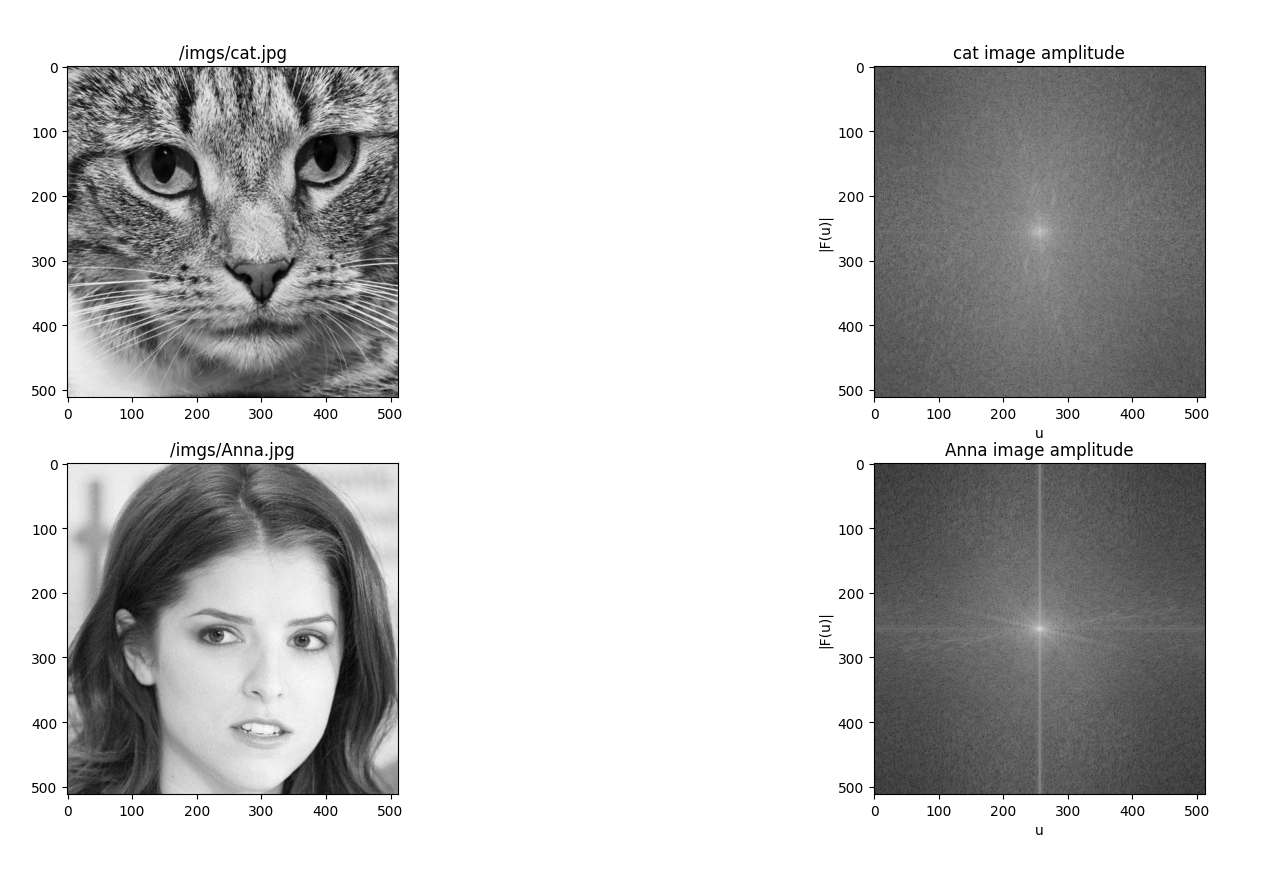

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Processing with Fourier Transform</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            font-size: 14px;
            color: #fff;
            background-color: #222;
            padding: 20px;
        }
        h1, h2 {
            color: #fff;
        }
        ol {
            list-style-type: decimal;
            padding-left: 20px;
            color: #fff;
        }
        p {
            color: #ddd;
        }
    </style>
</head>
<body>
    <ol>
        <li>
            <h2>Compute Fourier Transforms</h2>
            <p>Compute Fourier transforms of both images (CAT_I and ANNA_I) using the FFT algorithm.</p>
        </li>
        <li>
            <h2>Shift Fourier Transforms</h2>
            <p>Shift Fourier transforms of both images to center frequency components.</p>
        </li>
        <li>
            <h2>Extract Phase Information</h2>
            <p>Extract phase information from shifted Fourier transform of the cat image (phase_CAt).</p>
        </li>
        <li>
            <h2>Multiply Amplitude and Phase</h2>
            <p>Multiply amplitude spectrum of Anna's image by phase spectrum of the cat image.</p>
        </li>
        <li>
            <h2>Perform Inverse Fourier Transform</h2>
            <p>Perform inverse Fourier transform on combined frequency information to obtain new image.</p>
        </li>
    </ol>
</body>
</html>


In [ ]:

# Multiply the amplitude spectrum of Anna's image by the phase spectrum of the cat image
new_out_put =np.abs(ANNA_Img_f_shifted) * np.exp(1j * phase_CAt)

# Perform the inverse Fourier transform to obtain the new image
Shifted_back = np.fft.ifftshift(new_out_put)
new_out_put_restored = np.fft.ifft2(Shifted_back)

# Display the resulting image
present_image(np.abs(new_out_put_restored), "New Image")

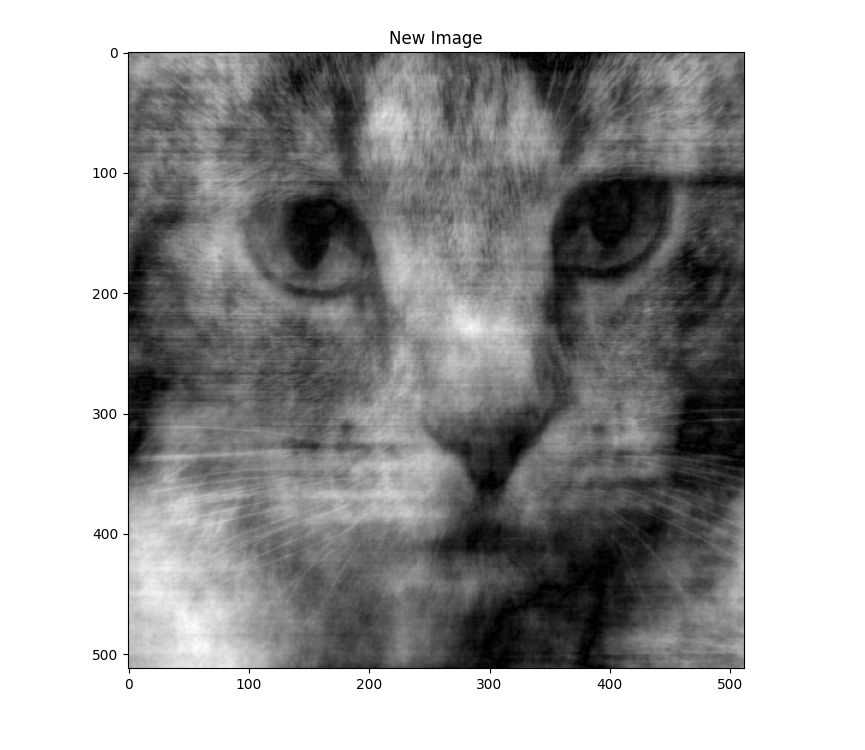

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Generation with Random Phases</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            color: #333;
        }
        h1, h2 {
            color: #0066cc;
        }
        p {
            color: #666;
        }
    </style>
</head>
<body>
    <h1>Image Generation with Random Phases</h1>
    <p>Create the following two images:</p>
    <ol>
        <li>
            <strong>An image generated from a randomly generated absolute array</strong>: Generate an absolute array randomly (paying attention to the value range!) with the phase of Anna.
        </li>
        <li>
            <strong>An image generated from the absolute value of Anna</strong>: Generate an image using the absolute value of Anna with a randomly generated phase.
        </li>
    </ol>
    <p>Display the images and explain.</p>
</body>
</html>
